# 00 Prerequisites

## 0001  Get the data
The processed Dataset is freely available on Kaggle

### kaggle link
<https://www.kaggle.com/bulter22/airline-data>

### CLI
```
kaggle datasets download -d bulter22/airline-data
```
the 'kaggle' command is hereby a cli tool for the Kaggle API
<https://github.com/Kaggle/kaggle-api>

In [ ]:
#kaggle datasets download -d bulter22/airline-data

## 0002 In addition to the standard python packages the following packages are needed
### pandas
<https://pypi.org/project/pandas/>
```
pip install pandas
```
### numpy
<https://pypi.org/project/numpy/>
```
pip install numpy
```
### matplotlib
<https://pypi.org/project/matplotlib/>
```
pip install matplotlib
```
### holidays
<https://pypi.org/project/holidays/>
```
pip install holidays
```
### scikit-learn
<https://pypi.org/project/scikit-learn/>
```
pip install scikit-learn
```
### imbalanced-learn
<https://pypi.org/project/imbalanced-learn/>
```
pip install imbalanced-learn
```

In [ ]:
### NECESSARY PACKAGES
#% pip install pandas
#% pip install numpy
#% pip install matplotlib
#% pip install holidays
#% pip install scikit-learn
#% pip install imbalanced-learn

## 0003 load global configuration parameters

In [26]:
### CONFIGURATION PARAMETER
AIRLINE_RAW_PATH = './airline.csv.shuffle'
AIRLINE_PATH = './airline.csv'
MODEL_RESULTS_PATH = './model_results.csv'
RANDOM_STATE = 33

# 01 Preprocess Given Dataset for the Exploratory Data Analysis

## 0101 Subset Dataset by Year
Subseting initial Dataframe to a dataframe solely containing data from 2007

Initial Data Frame:
- 123,534,969 Entries
- from x to Year

Updated Data Frame:
- 14,595,137 Entries
- from January 2006 to December 2007


In [32]:
# Read and Filter given Dataset
import pandas as pd
import time
import holidays
import datetime
from dateutil.easter import easter

SELECTED_YEARS = [2007]

start_time = time.time()
airline_df = pd.DataFrame()

initial_df_len = 0

# Create Data Reader
airline_data_reader = pd.read_csv(AIRLINE_RAW_PATH,
                    chunksize=10**6,
                    iterator=True,
                    encoding='iso8859-1')  

# Read Data Chunkwise and Filter by SELECTED_YEARS
for airline_df_chunk in airline_data_reader:
    initial_df_len = initial_df_len + len(airline_df_chunk.index) 
    airline_df_chunk = airline_df_chunk.query("Year == @SELECTED_YEARS")
    airline_df = pd.concat([airline_df,airline_df_chunk])

# Print Informations
print(f'Time Reduction Complete. Time Elapsed: {time.time() - start_time:.2f} Sec.')
print(f'Initial Data Frame Contained {initial_df_len:,} Entries')
print(f'Updated Data Frame Contains {len(airline_df.index):,} Entries')
print(f'Thus, the Data Frame was Reduced by {(1-len(airline_df.index)/initial_df_len)*100:.2f} %')

Time Reduction Complete. Time Elapsed: 566.16 Sec.
Initial Data Frame Contained 123,534,969 Entries
Updated Data Frame Contains 7,453,215 Entries
Thus, the Data Frame was Reduced by 93.97 %


## 0102 Display key dataframe informations

In [33]:
# display head
display(airline_df.head())

ActualElapsedTime  AirTime  ArrDelay  ArrTime  CRSArrTime  CRSDepTime  \
18               33.0     22.0      -3.0   1916.0        1919        1845   
30               81.0     60.0      -6.0   1049.0        1055         930   
44                NaN      NaN       NaN      NaN         841         745   
52              103.0     82.0      62.0   1536.0        1434        1238   
78               62.0     43.0       1.0   1015.0        1014         913   

    CRSElapsedTime CancellationCode  Cancelled  CarrierDelay  ...  Month  \
18            34.0              NaN          0           0.0  ...     11   
30            85.0              NaN          0           0.0  ...      8   
44            56.0                B          1           0.0  ...      2   
52           116.0              NaN          0           0.0  ...     12   
78            61.0              NaN          0           0.0  ...     10   

    NASDelay  Origin  SecurityDelay TailNum  TaxiIn  TaxiOut  UniqueCarrier  \
18       0.0     OGG            0.0  N477HA     5.0      6.0             HA   
30       0.0     CVG            0.0  N926EV     5.0     16.0             EV   
44       0.0     DEN            0.0  N434YV     0.0      0.0             YV   
52       0.0     ATL            0.0  N937AT     4.0     17.0             FL   
78       0.0     TYS            0.0  N925EV    10.0      9.0             EV   

    WeatherDelay  Year  
18           0.0  2007  
30           0.0  2007  
44           0.0  2007  
52           0.0  2007  
78           0.0  2007  

[5 rows x 29 columns]

In [34]:
# display shape and included column names
print(airline_df.shape)
print(airline_df.columns)

(7453215, 29)
Index(['ActualElapsedTime', 'AirTime', 'ArrDelay', 'ArrTime', 'CRSArrTime',
       'CRSDepTime', 'CRSElapsedTime', 'CancellationCode', 'Cancelled',
       'CarrierDelay', 'DayOfWeek', 'DayofMonth', 'DepDelay', 'DepTime',
       'Dest', 'Distance', 'Diverted', 'FlightNum', 'LateAircraftDelay',
       'Month', 'NASDelay', 'Origin', 'SecurityDelay', 'TailNum', 'TaxiIn',
       'TaxiOut', 'UniqueCarrier', 'WeatherDelay', 'Year'],
      dtype='object')


In [35]:
# describe dataframe
display(airline_df.describe())

ActualElapsedTime       AirTime      ArrDelay       ArrTime  \
count       7.275288e+06  7.275288e+06  7.275288e+06  7.275288e+06   
mean        1.263223e+02  1.028159e+02  1.019218e+01  1.482105e+03   
std         7.118009e+01  6.824577e+01  3.930774e+01  5.072241e+02   
min         1.200000e+01  0.000000e+00 -3.120000e+02  1.000000e+00   
25%         7.600000e+01  5.500000e+01 -9.000000e+00  1.107000e+03   
50%         1.080000e+02  8.400000e+01  0.000000e+00  1.513000e+03   
75%         1.560000e+02  1.310000e+02  1.400000e+01  1.911000e+03   
max         1.270000e+03  1.257000e+03  2.598000e+03  2.400000e+03   

         CRSArrTime    CRSDepTime  CRSElapsedTime     Cancelled  CarrierDelay  \
count  7.453215e+06  7.453215e+06    7.452221e+06  7.453215e+06  7.453215e+06   
mean   1.495392e+03  1.330596e+03    1.272502e+02  2.156761e-02  3.865236e+00   
std    4.815902e+02  4.647080e+02    7.035750e+01  1.452668e-01  2.084240e+01   
min    0.000000e+00  0.000000e+00   -1.240000e+03  0.000000e+00  0.000000e+00   
25%    1.115000e+03  9.300000e+02    7.700000e+01  0.000000e+00  0.000000e+00   
50%    1.520000e+03  1.322000e+03    1.100000e+02  0.000000e+00  0.000000e+00   
75%    1.906000e+03  1.720000e+03    1.560000e+02  0.000000e+00  0.000000e+00   
max    2.400000e+03  2.359000e+03    1.430000e+03  1.000000e+00  2.580000e+03   

          DayOfWeek  ...      Diverted     FlightNum  LateAircraftDelay  \
count  7.453215e+06  ...  7.453215e+06  7.453215e+06       7.453215e+06   
mean   3.933804e+00  ...  2.304911e-03  2.188099e+03       5.099134e+00   
std    1.992267e+00  ...  4.795413e-02  1.971958e+03       2.127753e+01   
min    1.000000e+00  ...  0.000000e+00  1.000000e+00       0.000000e+00   
25%    2.000000e+00  ...  0.000000e+00  5.900000e+02       0.000000e+00   
50%    4.000000e+00  ...  0.000000e+00  1.509000e+03       0.000000e+00   
75%    6.000000e+00  ...  0.000000e+00  3.553000e+03       0.000000e+00   
max    7.000000e+00  ...  1.000000e+00  9.602000e+03       1.031000e+03   

              Month      NASDelay  SecurityDelay        TaxiIn       TaxiOut  \
count  7.453215e+06  7.453215e+06   7.453215e+06  7.453215e+06  7.453215e+06   
mean   6.514876e+00  3.783702e+00   2.373553e-02  6.691984e+00  1.630015e+01   
std    3.425117e+00  1.617670e+01   1.084995e+00  5.151351e+00  1.183396e+01   
min    1.000000e+00  0.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00   
25%    4.000000e+00  0.000000e+00   0.000000e+00  4.000000e+00  1.000000e+01   
50%    7.000000e+00  0.000000e+00   0.000000e+00  5.000000e+00  1.400000e+01   
75%    9.000000e+00  0.000000e+00   0.000000e+00  8.000000e+00  1.900000e+01   
max    1.200000e+01  1.386000e+03   3.820000e+02  5.450000e+02  5.300000e+02   

       WeatherDelay       Year  
count  7.453215e+06  7453215.0  
mean   7.700904e-01     2007.0  
std    9.619547e+00        0.0  
min    0.000000e+00     2007.0  
25%    0.000000e+00     2007.0  
50%    0.000000e+00     2007.0  
75%    0.000000e+00     2007.0  
max    1.429000e+03     2007.0  

[8 rows x 24 columns]

## 0103 Sort Data Frame by Date
In order to create the 'Prior' feature, the data needs to be sorted by date in an ascending order.

In [36]:
# Sort Data by Date
SORT_ORDER = ['Year','Month','DayofMonth','CRSDepTime']

start_time = time.time()

# Sort data by Date, according to SORT_ORDER
airline_df = airline_df.sort_values(by=SORT_ORDER)

# Print Informations
print(f'Reading Data Complete. Time Elapsed: {time.time() - start_time:.2f} Sec.')
print(f'{len(airline_df.index):,} Rows sorted.')

Reading Data Complete. Time Elapsed: 11.13 Sec.
7,453,215 Rows sorted.


## 0103 Create Prior Origin Column ('Prior')
The Prior Class is created to find delays based on previous flights. To create this Column, the data gets sorted by time, then grouped by tail number so that for a specific Airplane grouped_df\[i] the previuous flight is at grouped_df\[i+1].

| TailNum | Prior | Origin | Dest |
|:--------|:------|:------|:------|
|  80019E |  None |    MGM |  MEM |
|  80019E |   MGM |    MEM |  ICT |
|  80019E |   MEM |    ICT |  MEM |
|  80019E |   ICT |    MEM |  CLT |
|  80019E |   MEM |    CLT |  MEM |

In [37]:
# Create 'Prior' Feature Column
start_time = time.time()
prior_orig = {}
prior_dest = {}

#Create and Fill Prior Column 
airline_df['Prior'] = None
prior_col_index = airline_df.columns.get_loc('Prior')
airline_df = airline_df.reset_index(drop=True) # Reset Index
for index,row in airline_df.iterrows():
    tail_num = row['TailNum']
    if tail_num in prior_orig and tail_num in prior_dest and prior_dest[tail_num] == row['Origin']:
        airline_df.iat[index,prior_col_index] = prior_orig[tail_num]
    prior_orig[tail_num] = row['Origin']
    prior_dest[tail_num] = row['Dest']

# Print Informations
print(f'Creating Prior Column Complete. Time Elapsed: {time.time() - start_time:.2f} Sec.')

Creating Prior Column Complete. Time Elapsed: 950.91 Sec.


## 0104 Create Arrival Delay Class ('ArrDelayClass') Column Based on Defined Thresholds
Since predicting the precise departure delay is an quite complex **Regression Problem**. The complexity of this task may be reduced by transferring it into a **Classification Problem**, where delay is grouped into several classes.
Defined Delay Threshold:
- 15 Min.

Thus, Defined Delay Class:
- **ON_TIME** or **0** (`if delay < 15 Min.`)
- **DELAYED** or **1** (`if delay >= 15 Min.`)

In [38]:
# Create Departure Delay Class ('ArrDelayClass') Column Based on DELAY_THRESHOLDS
import numpy as np

DELAY_THRESHOLD = 15

start_time = time.time()

# Create 'DepDelayClass' Column based on DELAY_THRESHOLDS
airline_df['ArrDelayClass'] = (np.select(
        condlist=[airline_df['ArrDelay'] <  DELAY_THRESHOLD, 
            airline_df['ArrDelay'] >=  DELAY_THRESHOLD], 
        choicelist=[0, 1], 
        default=1))

# Print Informations
print(f'Creating ArrDelayClass complete. Time Elapsed: {time.time() - start_time:.2f} Sec.')
for delay_class, entries in airline_df['ArrDelayClass'].value_counts().items():
    print(f'Delay Class {delay_class} Contains {entries:,} Entries, Thus {entries / len(airline_df.index) *100:.2f} % of All Entries')

Creating ArrDelayClass complete. Time Elapsed: 0.11 Sec.
Delay Class 0 Contains 5,471,968 Entries, Thus 73.42 % of All Entries
Delay Class 1 Contains 1,981,247 Entries, Thus 26.58 % of All Entries


## 0105 filter for top 50 airports
Further data reduction is peformed based on a lowerbound for included airports based on the number of recorded flights 

In [39]:
# Filter Dataframe for top 50 airports
import pandas as pd
import time

start_time = time.time()

#group and filter dataframe by airports
origin_class_count = airline_df['ArrDelayClass'].value_counts()
origin_count_df = airline_df['Origin'].value_counts()
origin_count_df = origin_count_df.sort_values(ascending=False)
IMPORTANT_AIRPORTS = origin_count_df.index.tolist()[:50]

# exclude airports from dataframe not in filtered airport list
initial_df_len = len(airline_df.index)
airline_df = airline_df.query("Origin == @IMPORTANT_AIRPORTS")
airline_df = airline_df.query("Dest == @IMPORTANT_AIRPORTS")
airline_df = airline_df.query("Prior == @IMPORTANT_AIRPORTS")
updated_class_count = airline_df['ArrDelayClass'].value_counts()

# Print Informations
print(f'Time Reduction Complete. Time Elapsed: {time.time() - start_time:.2f} Sec.')
for i,_ in updated_class_count.iteritems():
    print(f'{updated_class_count.loc[i]/origin_class_count.loc[i]*100:.2f} of class {i} perserved.')
print(f'Initial Data Frame Contained {initial_df_len:,} Entries')
print(f'Updated Data Frame Contains {len(airline_df.index):,} Entries')
print(f'Thus, the Data Frame was Reduced by {(1-len(airline_df.index)/initial_df_len)*100:.2f} %')

Time Reduction Complete. Time Elapsed: 12.03 Sec.
46.77 of class 0 perserved.
45.75 of class 1 perserved.
Initial Data Frame Contained 7,453,215 Entries
Updated Data Frame Contains 3,465,989 Entries
Thus, the Data Frame was Reduced by 53.50 %


## 0106 Convert HH:MM columns to HH column and MM column
Due to the HH:MM Dataformat the delta between 1259 (12:59) and 1258 (12:58) is not equal to the delta between 1259 (12:59) and 1300 (13:00). Thus the data is encoded here into two columns each.

In [40]:
#Transform HH:MM columns to HH column and MM column
start_time = time.time()

#Create DepTimeH & DepTimeM columns from DepTime
airline_df['DepTime'] = airline_df['DepTime'].astype(str).str.zfill(4)
airline_df['DepTimeH'] = airline_df['DepTime'].str[:2]
airline_df['DepTimeM'] = airline_df['DepTime'].str[2:]

#Create ArrTimeH & ArrTimeM columns from ArrTime
airline_df['ArrTime'] = airline_df['ArrTime'].astype(str).str.zfill(4)
airline_df['ArrTimeH'] = airline_df['ArrTime'].str[:2]
airline_df['ArrTimeM'] = airline_df['ArrTime'].str[2:]

#Create CRSDepTimeH & CRSDepTimeM columns from CRSDepTime
airline_df['CRSDepTime'] = airline_df['CRSDepTime'].astype(str).str.zfill(4)
airline_df['CRSDepTimeH'] = airline_df['CRSDepTime'].str[:2]
airline_df['CRSDepTimeM'] = airline_df['CRSDepTime'].str[2:]

#Create CRSArrTimeH & CRSArrTimeM columns from CRSArrTime
airline_df['CRSArrTime'] = airline_df['CRSArrTime'].astype(str).str.zfill(4)
airline_df['CRSArrTimeH'] = airline_df['CRSArrTime'].str[:2]
airline_df['CRSArrTimeM'] = airline_df['CRSArrTime'].str[2:]

# Drop HH:MM columns
airline_df = airline_df.drop(columns=['ArrTime','DepTime','CRSArrTime','CRSDepTime'])

# Print Informations
print(f'HH:MM to HH and MM transformation complete. Time Elapsed: {time.time() - start_time:.2f} Sec.')

HH:MM to HH and MM transformation complete. Time Elapsed: 28.42 Sec.


## 0107 Delete rows containing NaN values in crucial columns and Tail Numbers not including informations
In order to create a labeled dataset, Entries containing not enough information (e.g.: missing information on Arrivial Delay) needs to be excluded from the Dataset.
Furthermore the tail numbers '0' and '000000' seems to represent a placeholder tail number where included records contains a lot of NaN values in associated columns and otherwise insonsitent informations

In [41]:
#Delete Rows Without Departure Delay Information (NaN Values)
FILTERED_TAIL_NUMS = ['0','000000']

start_time = time.time()
initial_df_len = len(airline_df.index)

# Filter Data by 'ArrDelay' and 'Prior' != NaN
airline_df = airline_df[~pd.isna(airline_df['ArrDelay'])]
airline_df = airline_df[~pd.isna(airline_df['Prior'])]
airline_df = airline_df.query("TailNum != @FILTERED_TAIL_NUMS")

# Print Informations
print(f'Time Reduction Complete. Time Elapsed: {time.time() - start_time:.2f} Sec.')
print(f'Initial Data Frame Contained {initial_df_len:,} Entries')
print(f'Updated Data Frame Contains {len(airline_df.index):,} Entries')
print(f'Data Frame was Reduced by {(1-len(airline_df.index)/initial_df_len)*100:.2f} %')

Time Reduction Complete. Time Elapsed: 7.13 Sec.
Initial Data Frame Contained 3,465,989 Entries
Updated Data Frame Contains 3,441,800 Entries
Data Frame was Reduced by 0.70 %


## 0108 generate holiday feature
Holiday feature represents informations on wether or not a date associated with a record is a holiday (1) or not (0)

In [42]:
# extend holiday list with school holidays
import holidays
import datetime
from dateutil.easter import easter
start_time = time.time()
us_holidays = holidays.US()

for year in range(airline_df.Year.min(), airline_df.Year.max()+1):
    # Spring Break 1 week around Easter
    easter_date = easter(year)
    us_holidays.update([datetime.date(year,easter_date.month,x) for x in range(easter_date.day+1, easter_date.day+6)]) 

    # Summer Break 10-11 Weeks May to Aug OR Jun to Mid-Aug
    us_holidays.update([datetime.date(year,6,x) for x in range(1, 31)]) 
    us_holidays.update([datetime.date(year,7,x) for x in range(1, 32)]) 
    us_holidays.update([datetime.date(year,8,x) for x in range(1, 10)]) 

    # Fall Break 1-2 weeks in Sep or Oct - not included because its not taken in all states
    # us_holidays.update([datetime.date(year,10,x) for x in range()]) 

    # Winter Break the week with Presidents Day
    presidents_day = pd.date_range(f'{year}-02-01', f'{year}-02-28',freq='WOM-3MON')[0].day # get 3 MON of FEB
    us_holidays.update([datetime.date(year,2,x) for x in range(presidents_day, presidents_day+5)]) 

    # Christmas Break 21.12. - 01.01.
    us_holidays.update([datetime.date(year,12,x) for x in range(21,32)]) 

airline_df["Holiday"] = airline_df[["Year", "Month", "DayofMonth"]].apply(lambda x: int(datetime.date(*x) in us_holidays), axis=1)

# Print Informations
print(f'Holiday Column included. Time Elapsed: {time.time() - start_time:.2f} Sec.')

Holiday Column included. Time Elapsed: 29.28 Sec.


## 0108 Save Preprocessed Data Frame

In [43]:
# Save Preprocessed Data Frame
start_time = time.time()

airline_df.to_csv(AIRLINE_PATH, 
            index = False,
            chunksize=10**6,
            encoding='iso8859-1'
)

# Print Informations
print(f'Writing file complete. Time Elapsed: {time.time() - start_time:.2f} sec.')
print(f'Data Frame Written Contains of {len(airline_df.index):,} Rows and {len(airline_df.columns)} Columns.')

Writing file complete. Time Elapsed: 47.38 sec.
Data Frame Written Contains of 3,441,800 Rows and 36 Columns.


# 02 Exploratory Data Analysis
Visual analysis of the data for a better understanding

## 0201 Load Dataset

In [46]:
# Read Dataset
import pandas as pd
import numpy as np
import time
import math
import matplotlib.pyplot as plt

start_time = time.time()
airline_df = pd.DataFrame()
dtype= {
    'ActualElapsedTime' : int,
    'ArrDelay' : int,
    'DepTimeH' : int,
    'DepTimeM' : int,
    'ArrTimeH' : int,
    'ArrTimeM' : int,
    'CRSDepTimeH' : int,
    'CRSDepTimeM' : int,
    'CRSArrTimeH' : int,
    'CRSArrTimeM' : int,
    'CRSElapsedTime' : int,
    'CancellationCode' : str,
    'Cancelled' : int,
    'CarrierDelay' : int,
    'DayOfWeek' : int,
    'DayofMonth' : int,
    'DepDelay' : int,
    'DepTime' : int,
    'Dest' : str,
    'Distance' : int,
    'Diverted' : int,
    'FlightNum' : int,
    'LateAircraftDelay' : int,
    'Month' : int,
    'NASDelay' : int,
    'Origin' : str,
    'SecurityDelay' : int,
    'TailNum' : str,
    'TaxiIn' : int,
    'TaxiOut' : int,
    'UniqueCarrier' : str,
    'WeatherDelay' : int,
    'Year' : int,
    'ArrDelayClass' : int,
    'Prior' : str,
}

# Create Data Reader
airline_data_reader = pd.read_csv(AIRLINE_PATH,
                    chunksize=10**6,
                    iterator=True,
                    encoding='iso8859-1',
                    dtype=dtype
                    )  

# Read Data Chunkwise
for airline_df_chunk in airline_data_reader:
    airline_df = pd.concat([airline_df,airline_df_chunk])
airline_df

# Print Informations
print(f'Reading Data Complete. Time Elapsed: {time.time() - start_time:.2f} Sec.')
print(f'Initialized Data Frame Contains of {len(airline_df.index):,} Rows and {len(airline_df.columns)} Columns.')

Reading Data Complete. Time Elapsed: 15.78 Sec.
Initialized Data Frame Contains of 3,441,800 Rows and 36 Columns.


## 0202 display class distribution of "ArrDelayClass" class

ArrDelayClasses: [1 0]
74.36% of flights are on time, 25.64% are delayed
Of those who are delayed:
4.67% of the delay time is caused by WeatherDelay
32.43% of the delay time is caused by NASDelay
24.29% of the delay time is caused by CarrierDelay
0.18% of the delay time is caused by SecurityDelay


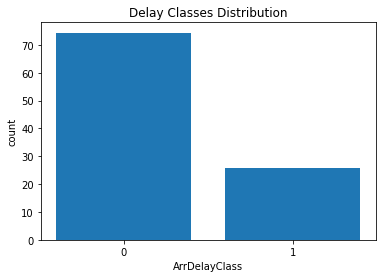

In [47]:
tmp_delay_perc = round(airline_df.groupby("ArrDelayClass").count().reset_index().AirTime/len(airline_df)*100, 2)

plt.bar(x=["0", "1"], height=list(tmp_delay_perc))
plt.title("Delay Classes Distribution")
plt.xlabel("ArrDelayClass")
plt.ylabel("count")
print(f"ArrDelayClasses: {airline_df.ArrDelayClass.unique()}")
print(f"{tmp_delay_perc[0]}% of flights are on time, {tmp_delay_perc[1]}% are delayed")
print("Of those who are delayed:")
tmp_df = airline_df.loc[airline_df.ArrDelay>=15]
for delay_type in ["WeatherDelay", "NASDelay", "CarrierDelay", "SecurityDelay"]:
    print(f"{round(sum(tmp_df[delay_type])/sum(tmp_df.ArrDelay)*100, 2)}% of the delay time is caused by {delay_type}")
plt.show()

## 0203 display delay and flight frequency distribution among a day


Text(1.3, 1.15, 'night: 22:00 - 5:00\nmorning: 5:00 - 12:00\nafternoon: 12:00 - 17:00\nevening: 17:00 - 22:00')

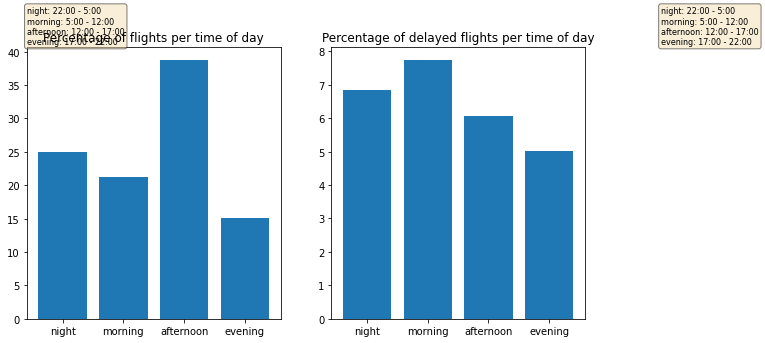

In [54]:
# transform DepTime into categorial variable (morning, afternoon, evening, night)
def convert_time_to_category(h:int, m:int) -> str:
    """
     0 = night (7:00h), 1 = morning (7:00h), 2 = afternoon (5h), 3 = evening (5h)
    """
    time = int(f"{int(h)}{int(m)}")
    if 2200 <= time <= 2400 or 0 <= time < 500:
        return "night"
    elif 500 <= time < 1200:
        return "morning"
    elif 1200 <= time < 1700:
        return "afternoon"
    elif 1700 <= time < 2200:
        return "evening"
    else:
        print("Could not convert time")
        return None
    
# transform DepTime into categorial variable (morning, afternoon, evening, night)
airline_df["DepTimeCat"] = airline_df[["DepTimeH", "DepTimeM"]].apply(lambda x: convert_time_to_category(*x), axis=1)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.bar(x=["night", "morning", "afternoon", "evening"], height=round(airline_df.groupby("DepTimeCat").count().reset_index().AirTime /len(airline_df) * 100, 2).tolist())
ax1.set_title("Percentage of flights per time of day")
textstr= "night: 22:00 - 5:00\nmorning: 5:00 - 12:00\nafternoon: 12:00 - 17:00\nevening: 17:00 - 22:00"
ax1.text(0, 1.15, textstr, transform=ax1.transAxes, fontsize=8, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax2.bar(x=["night", "morning", "afternoon", "evening"], height=round(airline_df.loc[airline_df.ArrDelayClass == 1].groupby("DepTimeCat").count().reset_index().AirTime /len(airline_df) * 100, 2).tolist())
ax2.set_title("Percentage of delayed flights per time of day")
ax2.text(1.3, 1.15, textstr, transform=ax2.transAxes, fontsize=8, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

## 0204 display delay and flight frequency distribution among a Week (Mon-Sun)

Text(0, 0.5, 'DepDelay [min]')

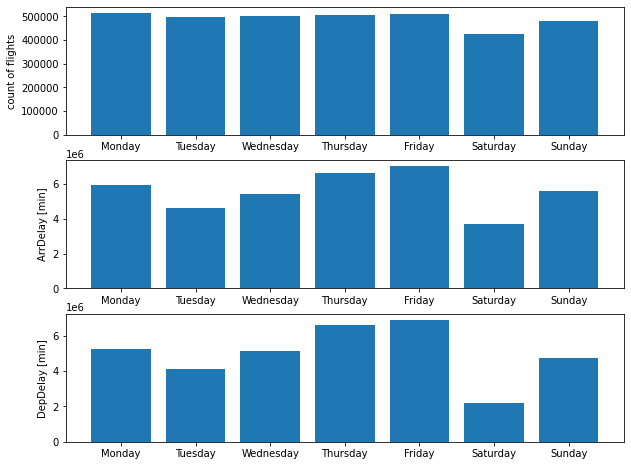

In [55]:
# 1= monday, 7=sunday
tmp_df = airline_df.groupby("DayOfWeek").count().reset_index()
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(10,8))
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax1.bar(x=days, height=tmp_df.AirTime)
ax1.set_ylabel("count of flights")

tmp_df = airline_df.groupby("DayOfWeek").sum().reset_index()
ax2.bar(x=days, height=tmp_df.DepDelay)
ax2.set_ylabel("ArrDelay [min]")

ax3.bar(x=days, height=tmp_df.ArrDelay)
ax3.set_ylabel("DepDelay [min]")

## 0205 display delay and flight frequency distribution among the year


Text(0, 0.5, 'DepDelay [min]')

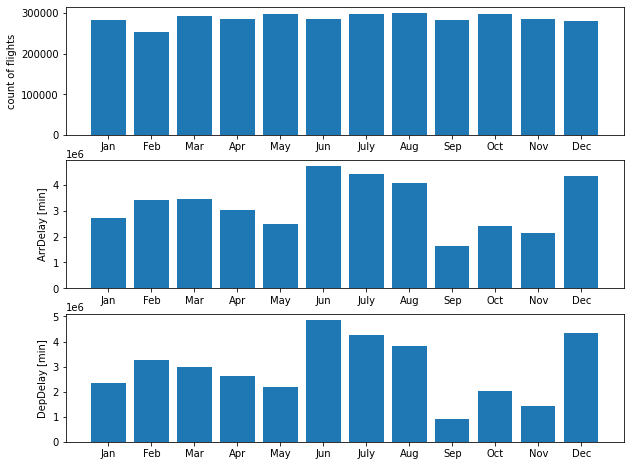

In [56]:
# 1= Jan, 12=Dec
tmp_df = airline_df.groupby("Month").count().reset_index()
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(10,8))
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "July", "Aug", "Sep", "Oct", "Nov", "Dec"]
ax1.bar(x=months, height=tmp_df.AirTime)
ax1.set_ylabel("count of flights")

tmp_df = airline_df.groupby("Month").sum().reset_index()
ax2.bar(x=months, height=tmp_df.DepDelay)
ax2.set_ylabel("ArrDelay [min]")

ax3.bar(x=months, height=tmp_df.ArrDelay)
ax3.set_ylabel("DepDelay [min]")

## 0206 display mean Arr delay based on origin airport

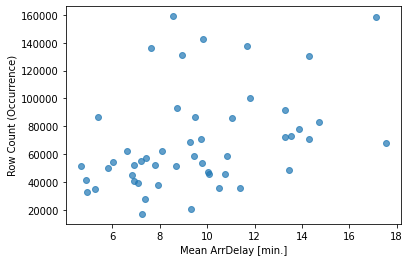

In [57]:
# create count column
airline_df['count'] = 1

fig = plt.figure()
ax = plt.gca()

# group Data Frame by UniqueCarrier 
for name, group in airline_df.groupby('Origin'):
    # add one scatter plot point per group
    ax.scatter(
        x=group['ArrDelay'].mean(),
        y= group['count'].sum(),
        c='#1f77b4',
        alpha =0.7, 
        label=name)
# add labels
plt.xlabel("Mean ArrDelay [min.]")
plt.ylabel("Row Count (Occurrence)")

# show the plot
plt.show()

## 0207 display Correlation between ArrDelay and DepDelay

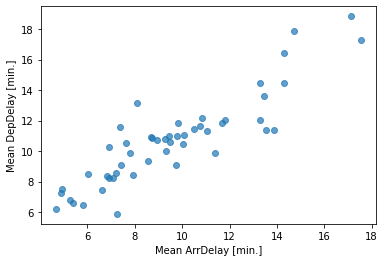

In [58]:
fig = plt.figure()
ax = plt.gca()

# group Data Frame by UniqueCarrier 
for name, group in airline_df.groupby('Origin'):
    # add one scatter plot point per group
    ax.scatter(
        x = group['ArrDelay'].mean(),
        y=group['DepDelay'].mean(),
        alpha =0.7, 
        c='#1f77b4',
        label=name)

# add labels
plt.xlabel("Mean ArrDelay [min.]")
plt.ylabel("Mean DepDelay [min.]")


# show the plot
plt.show()

## 0208 display mean delay based on routes (Origin to Dest)
Here a minimum threshold is implemented to exclude some noise

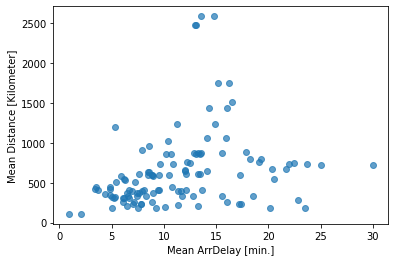

In [60]:
fig = plt.figure()
ax = plt.gca()

# group Data Frame by UniqueCarrier 
for name, group in airline_df.groupby(['Origin','Dest']):
    if group['count'].count() > 5000:
        ax.scatter(
            x = group['ArrDelay'].mean(),
            y=group['Distance'].mean(),
            c='#1f77b4',
            alpha =0.7, 
            label=name)

# add labels
plt.xlabel("Mean ArrDelay [min.]")
plt.ylabel("Mean Distance [Kilometer]")

# show the plot
plt.show()

# 03 Train Models

## 0301 General Data Transformations
### 030101 Read the Data

In [3]:
# Read Dataset
import pandas as pd
import time

benchmark = {}
start_time = time.time()
airline_df = pd.DataFrame()
dtype= {
    'ActualElapsedTime' : int,
    'ArrDelay' : int,
    'DepTimeH' : int,
    'DepTimeM' : int,
    'ArrTimeH' : int,
    'ArrTimeM' : int,
    'CRSDepTimeH' : int,
    'CRSDepTimeM' : int,
    'CRSArrTimeH' : int,
    'CRSArrTimeM' : int,
    'CRSElapsedTime' : int,
    'CancellationCode' : str,
    'Cancelled' : int,
    'CarrierDelay' : int,
    'DayOfWeek' : int,
    'DayofMonth' : int,
    'DepDelay' : int,
    'DepTime' : int,
    'Dest' : str,
    'Distance' : int,
    'Diverted' : int,
    'FlightNum' : int,
    'LateAircraftDelay' : int,
    'Month' : int,
    'NASDelay' : int,
    'Origin' : str,
    'SecurityDelay' : int,
    'TailNum' : str,
    'TaxiIn' : int,
    'TaxiOut' : int,
    'UniqueCarrier' : str,
    'WeatherDelay' : int,
    'Year' : int,
    'ArrDelayClass' : int,
    'Prior' : str,
}

# Create Data Reader
airline_data_reader = pd.read_csv(AIRLINE_PATH,
                    chunksize=10**6,
                    iterator=True,
                    encoding='iso8859-1',
                    dtype=dtype
                    )  

# Read Data Chunkwise
for airline_df_chunk in airline_data_reader:
    airline_df = pd.concat([airline_df,airline_df_chunk])
airline_df

# Print Informations
print(f'Reading Data Complete. Time Elapsed: {time.time() - start_time:.2f} Sec.')
print(f'Initialized Data Frame Contains of {len(airline_df.index):,} Rows and {len(airline_df.columns)} Columns.')

Reading Data Complete. Time Elapsed: 14.41 Sec.
Initialized Data Frame Contains of 3,441,800 Rows and 36 Columns.


### 030102 Sort Data by year

In [4]:
# Sort Data by Date
SORT_ORDER = ['Year','Month','DayofMonth','CRSDepTimeH','CRSDepTimeM']

start_time = time.time()

# Sort data by Date, according to SORT_ORDER
airline_df = airline_df.sort_values(by=SORT_ORDER)

# Print Informations
print(f'Reading Data Complete. Time Elapsed: {time.time() - start_time:.2f} Sec.')

Reading Data Complete. Time Elapsed: 1.89 Sec.


### 030103 Encode the Data

In [5]:
#encode data
from sklearn import preprocessing

#encoder
label_enc = preprocessing.LabelEncoder()

# Label encoding
airline_df['Dest'] = label_enc.fit_transform(airline_df['Dest'])
airline_df['Origin'] = label_enc.fit_transform(airline_df['Origin'])
airline_df['Prior'] = label_enc.fit_transform(airline_df['Prior'])
airline_df['TailNum'] = label_enc.fit_transform(airline_df['TailNum'])
airline_df['UniqueCarrier'] = label_enc.fit_transform(airline_df['UniqueCarrier'])

### 030104 Drop obsolete columns and split dataframe into submodels

In [6]:
# Drop unnecessary Columns for given Task
start_time = time.time()
initial_df_column_len = len(airline_df.columns)
initial_df_size = airline_df.size

airline_dfs = {}

# Drop obsolete columns from airline_df to get airline_df including base, featues and selected process data
OBSOLETE_COLUMNS = ['ActualElapsedTime', 'AirTime', 'ArrTimeH', 'ArrTimeM', 'ArrDelay', 'CancellationCode' , 'Cancelled', 'CarrierDelay', 'DepDelay', 'Diverted', 'LateAircraftDelay', 'NASDelay', 'SecurityDelay',  'TaxiIn', 'TaxiOut', 'WeatherDelay', 'FlightNum','Year']
airline_dfs['base_features_process'] = airline_df.drop(columns=OBSOLETE_COLUMNS)

# Drop process columns from airline_df to get airline_df including base and featues
PROCESS_COLUMNS = ['DepTimeH','DepTimeM']
airline_dfs['base_features'] = airline_dfs['base_features_process'].drop(columns=PROCESS_COLUMNS)

# Drop feature columns from airline_df to get airline_df including base
FEATURE_COLUMNS = ['Prior','Holiday']
airline_dfs['base'] = airline_dfs['base_features'].drop(columns=FEATURE_COLUMNS)

# Print Informations
print(f'Droping Columns Complete. Time Elapsed: {time.time() - start_time:.2f} sec.')
print(f'Initial Data Frame Contained {initial_df_column_len} Columns and {initial_df_size:,} Cells')
for df_type in airline_dfs:
    print(f'-- Data Frame Type: {df_type} --')
    print(f'Updated Data Frame Contains {len(airline_dfs[df_type].columns)} Columns and {airline_dfs[df_type].size:,} Cells')
    print(f'Thus, {df_type} reduces the Data Frame by {(1-airline_dfs[df_type].size/initial_df_size)*100:.2f} %')

Droping Columns Complete. Time Elapsed: 0.95 sec.
Initial Data Frame Contained 36 Columns and 123,904,800 Cells
-- Data Frame Type: base_features_process --
Updated Data Frame Contains 18 Columns and 61,952,400 Cells
Thus, base_features_process reduces the Data Frame by 50.00 %
-- Data Frame Type: base_features --
Updated Data Frame Contains 16 Columns and 55,068,800 Cells
Thus, base_features reduces the Data Frame by 55.56 %
-- Data Frame Type: base --
Updated Data Frame Contains 14 Columns and 48,185,200 Cells
Thus, base reduces the Data Frame by 61.11 %


### 030105 define fit and predict method
method peforms Grid Search Cross Validation (GSCV) using given parameters on a subset of data, then fits another classifier with best GSCV parameters on the full dataframe.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, fbeta_score, make_scorer
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score

def fit_and_predict(classifier, df:pd.DataFrame, subset_size = 100000, gscv = None ):
    start_time = time.time()
    model_results = {}
    sampler = RandomOverSampler(random_state=RANDOM_STATE)
    scoring = {'accuracy':'accuracy',
    'f2':make_scorer(fbeta_score, beta=2),
    'f1':'f1',
    'precision':'precision',
    'recall':'recall'}

    # peform Grid Search Cross Validation on subset of data
    if gscv and 'grid' in gscv and 'cv' in gscv:
        df_sub = df[:subset_size].copy()
        df_target = df_sub['ArrDelayClass']
        df_sub = df_sub.drop(columns='ArrDelayClass')
        data_train, data_test, target_train, target_test = train_test_split(
        df_sub, df_target,
            test_size=0.2, 
            shuffle=False,
            random_state=RANDOM_STATE)
        data_train, target_train = sampler.fit_resample(data_train,target_train)
        fited_gscv = GridSearchCV(classifier, gscv['grid'], 
            scoring=scoring, 
            n_jobs=-1, 
            cv=gscv['cv'], 
            refit='f2',
            verbose=1).fit(data_train,target_train)
        target_pred = fited_gscv.best_estimator_.predict(data_test)
        
        # save GSCV results
        model_results['gscv'] = {}
        model_results['gscv']['duration'] = time.time() - start_time
        model_results['gscv']['cv_results'] = fited_gscv.cv_results_ 
        model_results['gscv']['gscv_cv_score'] = fited_gscv.best_score_
        model_results['gscv']['f1_score'] = f1_score(target_test, target_pred)
        model_results['gscv']['f2_score'] = fbeta_score(target_test, target_pred, beta = 2)
        model_results['gscv']['precision'] = precision_score(target_test, target_pred)
        model_results['gscv']['recall'] = recall_score(target_test, target_pred)
        model_results['gscv']['accuracy'] = accuracy_score(target_test,target_pred)

        # set new classifier based on best gscv parameters
        classifier = classifier.set_params(**fited_gscv.best_estimator_.get_params())

        # print information
        print(f'gscv completed. Total duration: {model_results["gscv"]["duration"]:.2f} sec.')

    # Peform classifier fit and predict using full dataframe
    df_target = df['ArrDelayClass']
    df = df.drop(columns='ArrDelayClass')
    data_train, data_test, target_train, target_test = train_test_split(
        df, df_target,
            test_size=0.2, 
            shuffle=False,
            random_state=RANDOM_STATE)
    data_train, target_train = sampler.fit_resample(data_train,target_train)
    estimator = classifier.fit(data_train,target_train)
    target_pred = estimator.predict(data_test)

    # save classifier results
    model_results['duration'] = time.time() - start_time
    model_results['f1_score'] = f1_score(target_test, target_pred)
    model_results['f2_score'] = fbeta_score(target_test, target_pred, beta = 2)
    model_results['precision'] = precision_score(target_test, target_pred)
    model_results['recall'] = recall_score(target_test, target_pred)
    model_results['accuracy'] = accuracy_score(target_test,target_pred)
    model_results['params'] = estimator.get_params()
    model_results['data_size'] = len(df.index)
    
    return model_results 

## 0302 Decision Tree Classifier

### 030201 Configure Decision Tree

In [9]:
#Define Cassify Methods / Params
from sklearn.tree import DecisionTreeClassifier
parameter_grid = {
    'max_depth': [10,15,20,25,30,35,40, None],#20
    'min_samples_leaf': [2,5,10,15],
    'criterion': ['gini','entropy'],
    #'class_weight': ['balanced', None],
    #'splitter':['best', 'random'],
    #'ccp_alpha': [0.01],
    'min_impurity_decrease':[0.01]
}
cv = 5
gscv = {'cv': cv,'grid': parameter_grid}
classifier = DecisionTreeClassifier(random_state=RANDOM_STATE)

### 030202 peform tree_base model fit and predict

In [10]:
# Decision Tree base

results = fit_and_predict(classifier,airline_dfs['base'])

# save result to benchmark dict
results['code'] = 'tree_base'
benchmark[results['code']] = results

# print informations
print(f'{results["code"]} model sucessfully fittet. Total Duration: {results["duration"]:.2f} sek.')
print(f'MODEL RESULTS:')
print(f'Precision: {results["precision"]:.2f}')
print(f'Recall: {results["recall"]:.2f}')
print(f'F1_Score: {results["f1_score"]:.2f}')
print(f'f2_score: {results["f2_score"]:.2f}')
print(f'Accuracy: {results["accuracy"]:.2f}')
print(f'Hyperparamter used: {results["params"]}')

tree_base model sucessfully fittet. Total Duration: 80.86 sek.
MODEL RESULTS:
Precision: 0.32
Recall: 0.30
F1_Score: 0.31
f2_score: 0.30
Accuracy: 0.65
Hyperparamter used: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 33, 'splitter': 'best'}


### 030203 peform tree_base_gscv model fit and predict

In [11]:
# Decision Tree base_gscv

results = fit_and_predict(classifier,airline_dfs['base'],gscv=gscv)

# save result to benchmark dict
results['code'] = 'tree_base_gscv'
benchmark[results['code']] = results

# print informations
print(f'{results["code"]} model sucessfully fittet. Total Duration: {results["duration"]:.2f} sek.')
print(f'MODEL RESULTS:')
print(f'Precision: {results["precision"]:.2f}')
print(f'Recall: {results["recall"]:.2f}')
print(f'F1_Score: {results["f1_score"]:.2f}')
print(f'f2_score: {results["f2_score"]:.2f}')
print(f'Accuracy: {results["accuracy"]:.2f}')
print(f'Hyperparamter used: {results["params"]}')

Fitting 5 folds for each of 64 candidates, totalling 320 fits
gscv completed. Total duration: 10.56 sec.
tree_base_gscv model sucessfully fittet. Total Duration: 25.46 sek.
MODEL RESULTS:
Precision: 0.32
Recall: 0.64
F1_Score: 0.42
f2_score: 0.53
Accuracy: 0.54
Hyperparamter used: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.01, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 33, 'splitter': 'best'}


### 030204 peform tree_base_features_gscv model fit and predict

In [12]:
# Decision Tree base_features_gscv

results = fit_and_predict(classifier,airline_dfs['base_features'],gscv=gscv)

# save result to benchmark dict
results['code'] = 'tree_base_features_gscv'
benchmark[results['code']] = results

# print informations
print(f'{results["code"]} model sucessfully fittet. Total Duration: {results["duration"]:.2f} sek.')
print(f'MODEL RESULTS:')
print(f'Precision: {results["precision"]:.2f}')
print(f'Recall: {results["recall"]:.2f}')
print(f'F1_Score: {results["f1_score"]:.2f}')
print(f'f2_score: {results["f2_score"]:.2f}')
print(f'Accuracy: {results["accuracy"]:.2f}')
print(f'Hyperparamter used: {results["params"]}')

Fitting 5 folds for each of 64 candidates, totalling 320 fits
gscv completed. Total duration: 9.66 sec.
tree_base_features_gscv model sucessfully fittet. Total Duration: 26.00 sek.
MODEL RESULTS:
Precision: 0.32
Recall: 0.64
F1_Score: 0.42
f2_score: 0.53
Accuracy: 0.54
Hyperparamter used: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.01, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 33, 'splitter': 'best'}


### 030205 peform tree_base_features_process_gscv model fit and predict

In [13]:
# Decision Tree base_features_process_gscv

results = fit_and_predict(classifier,airline_dfs['base_features_process'],gscv=gscv)

results['code'] = 'tree_base_features_process_gscv'
benchmark[results['code']] = results


print(f'{results["code"]} model sucessfully fittet. Total Duration: {results["duration"]:.2f} sek.')
print(f'MODEL RESULTS:')
print(f'Precision: {results["precision"]:.2f}')
print(f'Recall: {results["recall"]:.2f}')
print(f'F1_Score: {results["f1_score"]:.2f}')
print(f'f2_score: {results["f2_score"]:.2f}')
print(f'Accuracy: {results["accuracy"]:.2f}')
print(f'Hyperparamter used: {results["params"]}')

Fitting 5 folds for each of 64 candidates, totalling 320 fits
gscv completed. Total duration: 10.61 sec.
tree_base_features_process_gscv model sucessfully fittet. Total Duration: 29.86 sek.
MODEL RESULTS:
Precision: 0.30
Recall: 0.83
F1_Score: 0.44
f2_score: 0.62
Accuracy: 0.46
Hyperparamter used: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.01, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 33, 'splitter': 'best'}


## 0303 Random Forest Classifier

### 030301 Configure Random Forest

In [14]:
#Define Cassify Methods / Params
from sklearn.ensemble import RandomForestClassifier
parameter_grid ={
    #'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['entropy','gini'],
    'n_estimators': [200, 250, 300, 350, 400],
    #'ccp_alpha': [0.01],
    'min_impurity_decrease':[0.005] #,0.01,0.02
}
cv = 3
gscv = {'cv': cv,'grid': parameter_grid}
classifier = RandomForestClassifier(n_jobs=-1,random_state=RANDOM_STATE)

### 030302 peform forest_base model fit and predict

In [15]:
# Random Forest base

results = fit_and_predict(classifier,airline_dfs['base'])

# save result to benchmark dict
results['code'] = 'forest_base'
benchmark[results['code']] = results

# print informations
print(f'{results["code"]} model sucessfully fittet. Total Duration: {results["duration"]:.2f} sek.')
print(f'MODEL RESULTS:')
print(f'Precision: {results["precision"]:.2f}')
print(f'Recall: {results["recall"]:.2f}')
print(f'F1_Score: {results["f1_score"]:.2f}')
print(f'f2_score: {results["f2_score"]:.2f}')
print(f'Accuracy: {results["accuracy"]:.2f}')
print(f'Hyperparamter used: {results["params"]}')

forest_base model sucessfully fittet. Total Duration: 272.61 sek.
MODEL RESULTS:
Precision: 0.42
Recall: 0.18
F1_Score: 0.25
f2_score: 0.21
Accuracy: 0.72
Hyperparamter used: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 33, 'verbose': 0, 'warm_start': False}


### 030303 peform forest_base_gscv model fit and predict

In [17]:
# Random Forest base_gscv

results = fit_and_predict(classifier,airline_dfs['base'],gscv=gscv)

# save result to benchmark dict
results['code'] = 'forest_base_gscv'
benchmark[results['code']] = results

# print informations
print(f'{results["code"]} model sucessfully fittet. Total Duration: {results["duration"]:.2f} sek.')
print(f'MODEL RESULTS:')
print(f'Precision: {results["precision"]:.2f}')
print(f'Recall: {results["recall"]:.2f}')
print(f'F1_Score: {results["f1_score"]:.2f}')
print(f'f2_score: {results["f2_score"]:.2f}')
print(f'Accuracy: {results["accuracy"]:.2f}')
print(f'Hyperparamter used: {results["params"]}')

Fitting 3 folds for each of 150 candidates, totalling 450 fits
gscv completed. Total duration: 469.44 sec.
forest_base_gscv model sucessfully fittet. Total Duration: 569.89 sek.
MODEL RESULTS:
Precision: 0.32
Recall: 0.59
F1_Score: 0.42
f2_score: 0.50
Accuracy: 0.57
Hyperparamter used: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.005, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 250, 'n_jobs': -1, 'oob_score': False, 'random_state': 33, 'verbose': 0, 'warm_start': False}


### 030304 peform forest_base_features_gscv model fit and predict

In [18]:
# Random Forest Baseline + GridSearchCrossValidation Model

results = fit_and_predict(classifier,airline_dfs['base_features'],gscv=gscv)

# save result to benchmark dict
results['code'] = 'forest_base_features_gscv'
benchmark[results['code']] = results

# print informations
print(f'{results["code"]} model sucessfully fittet. Total Duration: {results["duration"]:.2f} sek.')
print(f'MODEL RESULTS:')
print(f'Precision: {results["precision"]:.2f}')
print(f'Recall: {results["recall"]:.2f}')
print(f'F1_Score: {results["f1_score"]:.2f}')
print(f'f2_score: {results["f2_score"]:.2f}')
print(f'Accuracy: {results["accuracy"]:.2f}')
print(f'Hyperparamter used: {results["params"]}')

Fitting 3 folds for each of 150 candidates, totalling 450 fits
gscv completed. Total duration: 458.77 sec.
forest_base_features_gscv model sucessfully fittet. Total Duration: 552.81 sek.
MODEL RESULTS:
Precision: 0.32
Recall: 0.59
F1_Score: 0.42
f2_score: 0.50
Accuracy: 0.57
Hyperparamter used: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.005, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 250, 'n_jobs': -1, 'oob_score': False, 'random_state': 33, 'verbose': 0, 'warm_start': False}


### 030205 peform forest_base_features_process_gscv model fit and predict

In [19]:
# Random Forest base_features_process_gscv

results = fit_and_predict(classifier,airline_dfs['base_features_process'],gscv=gscv)

# save result to benchmark dict
results['code'] = 'forest_base_features_process_gscv'
benchmark[results['code']] = results

# print informations
print(f'{results["code"]} model sucessfully fittet. Total Duration: {results["duration"]:.2f} sek.')
print(f'MODEL RESULTS:')
print(f'Precision: {results["precision"]:.2f}')
print(f'Recall: {results["recall"]:.2f}')
print(f'F1_Score: {results["f1_score"]:.2f}')
print(f'f2_score: {results["f2_score"]:.2f}')
print(f'Accuracy: {results["accuracy"]:.2f}')
print(f'Hyperparamter used: {results["params"]}')

Fitting 3 folds for each of 150 candidates, totalling 450 fits
gscv completed. Total duration: 598.98 sec.
forest_base_features_process_gscv model sucessfully fittet. Total Duration: 738.40 sek.
MODEL RESULTS:
Precision: 0.31
Recall: 0.68
F1_Score: 0.43
f2_score: 0.55
Accuracy: 0.53
Hyperparamter used: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.005, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 250, 'n_jobs': -1, 'oob_score': False, 'random_state': 33, 'verbose': 0, 'warm_start': False}


## 0303 MLP

In [20]:
#Define Cassify Methods / Params
from sklearn.neural_network import MLPClassifier 
import random as rand
random_hidden_layer_sizes = [(rand.randrange(80, 150), rand.randrange(35, 75),rand.randrange(80, 150)) for i in range(100)]
parameter_grid = {
    "hidden_layer_sizes": random_hidden_layer_sizes, #[(150,75, 125), (225,75,125), (150,125,100)]
    "activation": ["relu"], # "tanh"
    "solver": ["adam"],
    "alpha": [0.0001], #, 0.0007, 0.0010, 0.0015 , 0.0005, 0.0003
    "batch_size": ["auto"],
    "learning_rate": ["adaptive"], #constant
    "warm_start": [False], # True
    "early_stopping": [True]
}
cv = 3
gscv = {'cv': cv,'grid': parameter_grid}
classifier = MLPClassifier(random_state=RANDOM_STATE)

### 030302 peform mlp_base model fit and predict

In [21]:
# MLP base

results = fit_and_predict(classifier,airline_dfs['base'])

# save result to benchmark dict
results['code'] = 'mlp_base'
benchmark[results['code']] = results

# print informations
print(f'{results["code"]} model sucessfully fittet. Total Duration: {results["duration"]:.2f} sek.')
print(f'MODEL RESULTS:')
print(f'Precision: {results["precision"]:.2f}')
print(f'Recall: {results["recall"]:.2f}')
print(f'F1_Score: {results["f1_score"]:.2f}')
print(f'f2_score: {results["f2_score"]:.2f}')
print(f'Accuracy: {results["accuracy"]:.2f}')
print(f'Hyperparamter used: {results["params"]}')

mlp_base model sucessfully fittet. Total Duration: 765.26 sek.
MODEL RESULTS:
Precision: 0.34
Recall: 0.29
F1_Score: 0.32
f2_score: 0.30
Accuracy: 0.67
Hyperparamter used: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 33, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


### 030303 peform mlp_base_gscv model fit and predict

In [22]:
# MLP base_gscv

results = fit_and_predict(classifier,airline_dfs['base'],gscv=gscv)

# save result to benchmark dict
results['code'] = 'mlp_base_gscv'
benchmark[results['code']] = results

# print informations
print(f'{results["code"]} model sucessfully fittet. Total Duration: {results["duration"]:.2f} sek.')
print(f'MODEL RESULTS:')
print(f'Precision: {results["precision"]:.2f}')
print(f'Recall: {results["recall"]:.2f}')
print(f'F1_Score: {results["f1_score"]:.2f}')
print(f'f2_score: {results["f2_score"]:.2f}')
print(f'Accuracy: {results["accuracy"]:.2f}')
print(f'Hyperparamter used: {results["params"]}')

Fitting 3 folds for each of 100 candidates, totalling 300 fits
gscv completed. Total duration: 1595.54 sec.
mlp_base_gscv model sucessfully fittet. Total Duration: 3288.79 sek.
MODEL RESULTS:
Precision: 0.33
Recall: 0.49
F1_Score: 0.39
f2_score: 0.45
Accuracy: 0.61
Hyperparamter used: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (94, 63, 128), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 33, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


### 030304 peform mlp_base_features_gscv model fit and predict

In [23]:
# MLP base_features_gscv

results = fit_and_predict(classifier,airline_dfs['base_features'],gscv=gscv)

# save result to benchmark dict
results['code'] = 'mlp_base_features_gscv'
benchmark[results['code']] = results

# print informations
print(f'{results["code"]} model sucessfully fittet. Total Duration: {results["duration"]:.2f} sek.')
print(f'MODEL RESULTS:')
print(f'Precision: {results["precision"]:.2f}')
print(f'Recall: {results["recall"]:.2f}')
print(f'F1_Score: {results["f1_score"]:.2f}')
print(f'f2_score: {results["f2_score"]:.2f}')
print(f'Accuracy: {results["accuracy"]:.2f}')
print(f'Hyperparamter used: {results["params"]}')

Fitting 3 folds for each of 100 candidates, totalling 300 fits
gscv completed. Total duration: 1733.67 sec.
mlp_base_features_gscv model sucessfully fittet. Total Duration: 6016.56 sek.
MODEL RESULTS:
Precision: 0.35
Recall: 0.41
F1_Score: 0.38
f2_score: 0.39
Accuracy: 0.65
Hyperparamter used: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (82, 74, 134), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 33, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


### 030305 peform mlp_base_features_process_gscv model fit and predict

In [24]:
# MLP base_features_process_gscv

results = fit_and_predict(classifier,airline_dfs['base_features_process'],gscv=gscv)

# save result to benchmark dict
results['code'] = 'mlp_base_features_process_gscv'
benchmark[results['code']] = results

# print informations
print(f'{results["code"]} model sucessfully fittet. Total Duration: {results["duration"]:.2f} sek.')
print(f'MODEL RESULTS:')
print(f'Precision: {results["precision"]:.2f}')
print(f'Recall: {results["recall"]:.2f}')
print(f'F1_Score: {results["f1_score"]:.2f}')
print(f'f2_score: {results["f2_score"]:.2f}')
print(f'Accuracy: {results["accuracy"]:.2f}')
print(f'Hyperparamter used: {results["params"]}')

Fitting 3 folds for each of 100 candidates, totalling 300 fits
gscv completed. Total duration: 2656.51 sec.
mlp_base_features_process_gscv model sucessfully fittet. Total Duration: 4825.19 sek.
MODEL RESULTS:
Precision: 0.76
Recall: 0.67
F1_Score: 0.71
f2_score: 0.69
Accuracy: 0.86
Hyperparamter used: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (123, 51, 103), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 33, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


## 0304 Print and Save Benchmark Results.

In [31]:
benchmark_df = pd.DataFrame.from_dict(benchmark,orient='index')
display(benchmark_df.drop(columns=['code','gscv','params']))

duration  f1_score  f2_score  precision  \
tree_base                            80.863997  0.308866  0.303974   0.317379   
tree_base_gscv                       25.457524  0.422810  0.531950   0.315071   
tree_base_features_gscv              26.004139  0.422810  0.531950   0.315071   
tree_base_features_process_gscv      29.857562  0.444389  0.617683   0.302802   
forest_base                         272.614513  0.254948  0.206763   0.416860   
forest_base_gscv                    569.891498  0.415608  0.504232   0.321445   
forest_base_features_gscv           552.806836  0.415608  0.504232   0.321445   
forest_base_features_process_gscv   738.403422  0.428959  0.550287   0.313689   
mlp_base                            765.261755  0.315521  0.301540   0.341946   
mlp_base_gscv                      3288.789469  0.393435  0.446276   0.328590   
mlp_base_features_gscv             6016.556612  0.375654  0.393431   0.349346   
mlp_base_features_process_gscv     4825.186234  0.713547  0.688605   0.759390   

                                     recall  accuracy  data_size  
tree_base                          0.300798  0.650160    3441800  
tree_base_gscv                     0.642520  0.544106    3441800  
tree_base_features_gscv            0.642520  0.544106    3441800  
tree_base_features_process_gscv    0.834676  0.457589    3441800  
forest_base                        0.183626  0.721085    3441800  
forest_base_gscv                   0.587794  0.570415    3441800  
forest_base_features_gscv          0.587794  0.570415    3441800  
forest_base_features_process_gscv  0.678162  0.530769    3441800  
mlp_base                           0.292888  0.669756    3441800  
mlp_base_gscv                      0.490164  0.607220    3441800  
mlp_base_features_gscv             0.406247  0.649062    3441800  
mlp_base_features_process_gscv     0.672924  0.859589    3441800

In [45]:
# Save Preprocessed Data Frame
start_time = time.time()

benchmark_df.drop(columns=['gscv']).to_csv('./t.csv', 
            index = False,
            encoding='iso8859-1'
)

# Print Informations
print(f'Writing file complete. Time Elapsed: {time.time() - start_time:.2f} sec.')
print(f'Data Frame Written Contains of {len(benchmark_df.index):,} Rows and {len(benchmark_df.columns)} Columns.')

Writing file complete. Time Elapsed: 0.00 sec.
Data Frame Written Contains of 12 Rows and 10 Columns.
